# 논문 읽어!!!!

# AlexNet : 렐루~

<img src="./image/alexnet.png">

- 영상 데이터 베이스를 기반으로 한 화상 인식 대회 "ILSVRC 2012"에서 우승한 CNN 구조

- AlexNet 은 합성곱층 다섯 개와 완전연결층 세개로 구성되어 있으며, 맨 마지막 완전연결층은 카테고리 1000개를 분류하기 위해 소프트 맥스 확성화 함수를 사용

- LeNet-5 와 크게 다르지 않지만 GPU 두 개를 기반으로 한 병렬 구조인 점이 가장 큰 차이점 : 이유 그래픽 카드가 너무 작아서 쪼개넣은것임

- 요새는 병렬 구조는 안씀

- AlexNet 의 차별점
    - ReLU 의 사용 (이때 하이퍼볼릭 탄젠트가 핫했음)
        - 이전까지는 tnh 함수를 사용
        - tanh 에 비해 6배 빠른 속도
    - overlapping pooling
        - 풀링 커널이 움직이는 보폭인 stride 를 커널 사이즈 보다 작게 하는 방법
     
    - Local Response Normalization(LRN) : 균형 맞춰주기
        - ReLU 를 사용하여 양수값을 그대로 전달하면 너무 큰 값이 전달되어 주변의 다른 값에 비해 지나치게 강한 자극이 됨(측면억제현상:착시효과)
     
        - 따라서 일부 큰 값이 주변의 작은 값을 억누르는 효과를 방지
     
        - 현재는 이 기법이 더 발전하여 BatchNormalization 이 됨
     
- 모델 과적합을 막기 위한 방법

    - dropout 사용
 
    - Data augmentation(데이터 증강) 사용
 
        - 데이터의 양을 늘리는 것
     
        - 하나의 이미지를 가지고 여러 장의 비슷한 이미지를 만들어냄

# VGGNet : 층 깊이

<img src="./image/vggnet.png">

- 카렌 시모니안(Karen Simonyan) 과 앤드류 지서만 (Andrew Zisserman)이 2014년 ICLR 에 게재한 Very deep convolutional networks for large-scale image recognition 논문에서 처음 발표

- VGGNet 은 합성곱층의 파라미터 수를 줄이고 훈련 시간을 개선하려고 탄생

    - 즉, 네트워크를 깊게 만드는 것이 성능에 어떤 영향을 미치는지 확인하고자 연구
 
    - 깊이의 영향만 확인하기 위해서 합성곱츠의 필터/커널의 크기를 3*3 으로 고정
 
    - 역사적으로 VGGNET 이후로 네트워크 의 깊이가 확 깊어짐 

- 네크워크 계층의 총 개수에 따라 여러 유형의 VGGNet(VGG16, VGG19) 등이 있음

<img src = "./image/vggnet_models.jpg">

## Factorizing convolution

<img src ="image/vggnet_filter.png" width="500">

- VGGNet 은 새로운 구조보다는 네트워크의 깊이가 끼치는 영향에 집중했기 때문에 단순히 3*3 합성곱층을 겹치느는 구조를 만듦

- 위 이미지에서 3*3 필터로 두번 합성곱을 하는 것과 5*5 필터로 한 번 합성곱을 하는 것이 결과적으로 동일한 사이즈의 특성맵을 산출

- 3*3 필터가 2개면 총 18개의 가중치를 갖는데 5*5 필터는 25개의 가중치를 가지기 때문에 3*3 필터를 사용하는 것이 훈련 속도가 빨라짐

    - 동시에 층의 갯수가 늘어나면서 활성화 함수를 한 번 더 사용하게 되어 특성의 비선형성이 증가 되어 유용한 특성을 찾기 유용해짐
 
    - 하지만 일정 깊이 이상에서는 성능 개선 효과가 미미함(기울기소실때문에)

# GoogLeNet : 개많은레이어

- 2014년 ILSVRC 에서 1위를 차지한 모델

- 가장 큰 변화는 네트워크의 깊이

    - 2014년 GoogLeNet 과 VGGNet 이 각각 22layer, 19layer 로 그 이전의 10미만의 layer 에 비해 2배이상 커짐
 
    - 2015년 뇌절 모델. ResNet 은 152개 layer 모델 나옴
 
    - 신경망이 깊어지면 파라미터 수가 증가하고 그 결과 과대적합 문제가 발생하거나 연산량이 늘어나는 문제가 있음
 
      - 따라서 Google 에서는 inception 모듈을 통해 이 문제를 해결
     
- 주어진 하드웨어 자원을 최대한 효율적으로 이용하면서 학습능력은 극대화할 수 있는 깊고 넓은 신경망

## Inception

<img src = "./image/googlenet_inception.png">

- 깊고 넓은 신경망을 위해 인셉션(inception) 모듈을 추가
    - 인셉션 모듈에서는 특징을 효율적으로 추출하기 위해  1*1, 3*3, 5*5 합성곱 연산을 각각 수행
 
- 더 다양한 특성을 추출하기 위해 여러 개의 합성곱층을 병렬적으로 사용

- 예시) 텍스트 : n-gram : 주변 단어 몇개 묶을건지 단위 => 합성곱과 비슷한 개념이 된다~

- 원래 초기에는 1*1/3*3/5*5/3*3MaxPooling 을 나란히 놓는 구조

    - 이 경우 서로 다른 크기를 가지는 필터를 적용하여 다른 scale 의 특성을 추출할 수 있음
 
    - 하지만 연산량이 너무 많아서 네트워크가 깊어지면 치명적인 문제가 될 수 있음
 
    - 따라서 모듈의 연산량을 줄이기 위해 1*1 합성곱으로 특성맵의 차원 수(채널수)를 줄임
 
<!-- <img src = "./image/googlenet_bottleneck.png" width="500"> -->
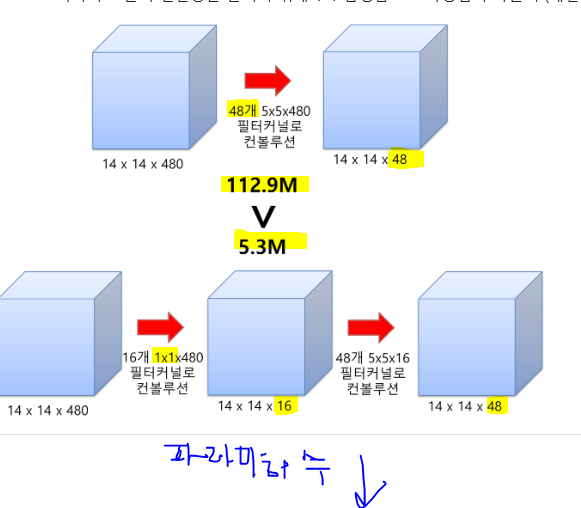

# ResNet : 분야를 안가리고 중요한 논문!!!!

<img src = "./image/resnet.png">

- 뇌절논문

- 마이크로소프트에서 개발한 알고리즘으로 Deep Residual Learning for Image Recognition 이라는 논문에서 발표

- ResNet 의 핵심은 **깊어진 신경망을 효과적으로 학습**하기 위한 방법으로 residual 개념을 고안한 것

    - 일반적으로 신경망은 깊이가 깊어질수록 성능이 좋아지다가 일정한 단계에 다다르면 오히려 성능이 나빠짐
    
    - 즉, 네트워크 깊이가 깊다고 해서 무조건 성능 좋아지지는 않음
    
    - ResNet 은 이러한 문제를 해결하기 위해 residual block 을 도입
 
- 기울기 소멸

    - GoogLeNet 은 층이 22개로 구성된 것에 비해 ResNet 은 층이 152개로 구성되어 기울기 소멸 문제가 발생
 
    - 기울기 소멸의 원인
 
        - layer가 깊어졌을 때 optimization 이 제대로 되지 않아서 라고 추측
     
        - 만약 추측대로 optimization 이 문제라면
     
            - 새로운 optimizer 를 만들거나
         
            - **깊어지더라도 쉽게 Optimization 을 할 수 있는 구조를 만들어 해결** => 이쪽 선택

## Residual block

<img src="./image/resnet_residualblock.png">

- 아이디어 : 걍 해석안하고 보내면 어떰 ?????
- 그 약간의 변화량이 히든 state 를 만드는 구조
- 수정해야하는 애들만!!! 학습!!!!!

- block 은 계층의 묶음
- 합성곱층을 하나의 블록으로 묶은 것

- 기존 네트워크는 입력 x를 받고 layer 를 거쳐 H(x)를 출력함
- 이는 입력값 x를 타겟값 y로 매핑하는 함수 H(x)를 얻는것이 목적

- ResNet은 H(x)가 아닌 H(x) - x 를 얻도록 목표를 수정
    - 따라서 F(x) = H(x) - x를 최소화시키는 것이 목적이 됨
        - 즉, 출력과 입력의 차를 줄인다는 의미
        
        - 여기서 x의 값은 도중에 바꾸지 못하는 입력값이므로 **F(x)가 0이 되는 것이 최적의 해** (영향을 안주려는게 목표임)
        - 0 = H(x) - x 로 H(x) = x가 됨
        - H(x) 를 x로 매핑하는 것이 학습의 목표
     
- 이전에는 알지 못하는 최적의 값을 찾기 위해 H(x)를 학습시켜야 한다는 점 때문에 최적화에 어려움이 있엇음
    - H = x 라는 최적의 값이 사전에 제공되어 학습이 훨씬 쉬워짐
- 결과적으로 ResNet 은 VGG 를 뼈대로, 단순히 입력에서 출력으로 바로 연결되는 shortcut 만 추가
    - 입력과 같은 x가 그대로 출력에 연결되기 때문에 파라미터 수에 영향이 없고 연산량의 증가도 없음

# 이미지 분류 신경망 결론

- 신경망은 이미 구현된 모델을 재사용할 수 있는 것이 많기 때문에 누군가가 만들어 놓은 신경망을 가져다 쓰기만 하면 됨

- 중요한 점은 내가 가진 데이터에 가장 적합한 모델을 선택하는 것과 그 구조를 알고 사용하는 것

    - 네트워크에 수정이 필요한 경우, 네트워크를 알고 있다면 수정이 훨씬 쉬움
    
        - 따라서 새로운 모델이 발표되더라도 구조부터 익히고 사용